In [1]:
from transformers import pipeline
from PIL import Image
import numpy as np

In [2]:
segmenter = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


# Set up functions to Segment Clothes

In [4]:
# Initialize segmentation pipeline
def segment_clothing(img, clothes= ["Upper-clothes", "Pants", "Belt"]):
    # Segment image
    segments = segmenter(img)

    # Create list of masks
    mask_list = []
    for s in segments:
        if(s['label'] in clothes):
            mask_list.append(s['mask'])


    # Paste all masks on top of eachother 
    final_mask = np.array(mask_list[0])
    for mask in mask_list:
        current_mask = np.array(mask)
        final_mask = final_mask + current_mask
            
    # Convert final mask from np array to PIL image
    final_mask = Image.fromarray(final_mask)

    # Apply mask to original image
    img.putalpha(final_mask)

    # display the image
    return img

In [5]:
def batch_segment_clothing(img_dir, out_dir, clothes= ["Hat", "Upper-clothes", "Skirt", "Pants", "Dress", "Belt", "Left-shoe", "Right-shoe", "Scarf"]):
    # Create output directory if it doesn't exist
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # Iterate through each file in the input directory
    for filename in os.listdir(img_dir):
        if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".png") or filename.endswith(".PNG"):
            try:
                # Load image
                img_path = os.path.join(img_dir, filename)
                img = Image.open(img_path).convert("RGBA")

                # Segment clothing
                segmented_img = segment_clothing(img, clothes)

                # Save segmented image to output directory as PNG
                out_path = os.path.join(out_dir, filename.split('.')[0] + ".png")
                segmented_img.save(out_path)

                print(f"Segmented {filename} successfully.")

            except Exception as e:
                print(f"Error processing {filename}: {e}")

        else:
            print(f"Skipping {filename} as it is not a supported image file.")

# scrape website and create csv file

In [ ]:
from playwright.async_api import async_playwright

playwright = await async_playwright().start()

browser = await playwright.chromium.launch(headless=True)

page = await browser.new_page()

In [ ]:
RL_url = "https://www.ralphlauren.com/women-clothing" 
await page.goto(RL_url)
rl= await page.eval_on_selector_all(
    "[srcset]",
    "elements => elements.map(el => el.getAttribute('srcset'))"
)

In [ ]:
Links=[]
d={}
d['Ralph_Lauren']=rl
Links.append(d)
df = pd.concat([pd.DataFrame(d) for l in Links], ignore_index=True)
df.to_csv('Image_Sources.csv',index=False)

# Read url from the csv file & Segmentation

In [6]:
import urllib.request
from urllib.parse import unquote
import re
import pandas as pd
import os

df=pd.read_csv('Image_Sources.csv')

In [7]:
for col in df.columns:
    links=df[col]
    # Create a folder for the current column if needed
    os.makedirs(col, exist_ok=True)
    paths=[]
    try: 
        for l in links:
            # URL of the file to download
            url = l

            # Extract the filename from the URL
            filename = url.split("/")[-1]  # Default fallback if Content-Disposition is not available
            filename = unquote(filename)  # Decode URL-encoded characters in the filename

            # Combine column name folder path with filename
            filepath = os.path.join(col, filename)
            
            # Download and save the file
            urllib.request.urlretrieve(url, filepath)
            
            print(f"File downloaded and saved as: {filepath}")
            
            
            # open the file
            image=Image.open(filepath)

            # segment the clothes
            result = segment_clothing(img=image)
            result.save(f'{filepath}.png')
            paths.append(f'{filepath}.png')
    except:
        print("This image cound't be found:",l)

File downloaded and saved as: Ralph Lauren/s7-AI211910443018_alternate10?$plpDeskRFAlt$
File downloaded and saved as: Ralph Lauren/s7-AI211910443018_alternate10?$plpDeskRFAlt$
File downloaded and saved as: Ralph Lauren/s7-AI211910443018_lifestyle?$plpDeskRF$
File downloaded and saved as: Ralph Lauren/s7-AI211910443018_lifestyle?$plpMob$
File downloaded and saved as: Ralph Lauren/s7-1485489_alternate10?$plpDeskRFAlt$
File downloaded and saved as: Ralph Lauren/s7-1485489_alternate10?$plpDeskRFAlt$
File downloaded and saved as: Ralph Lauren/s7-1485489_lifestyle?$plpDeskRF$
File downloaded and saved as: Ralph Lauren/s7-1485489_lifestyle?$plpMob$
File downloaded and saved as: Ralph Lauren/s7-1331967_alternate10?$plpDeskRFAlt$
File downloaded and saved as: Ralph Lauren/s7-1331967_alternate10?$plpDeskRFAlt$
File downloaded and saved as: Ralph Lauren/s7-1474897_lifestyle?$plpDeskRF$
File downloaded and saved as: Ralph Lauren/s7-1474897_lifestyle?$plpMob$
File downloaded and saved as: Ralph Lau

In [8]:
paths

['Ralph Lauren/s7-AI211910443018_alternate10?$plpDeskRFAlt$.png',
 'Ralph Lauren/s7-AI211910443018_alternate10?$plpDeskRFAlt$.png',
 'Ralph Lauren/s7-AI211910443018_lifestyle?$plpDeskRF$.png',
 'Ralph Lauren/s7-AI211910443018_lifestyle?$plpMob$.png',
 'Ralph Lauren/s7-1485489_alternate10?$plpDeskRFAlt$.png',
 'Ralph Lauren/s7-1485489_alternate10?$plpDeskRFAlt$.png',
 'Ralph Lauren/s7-1485489_lifestyle?$plpDeskRF$.png',
 'Ralph Lauren/s7-1485489_lifestyle?$plpMob$.png',
 'Ralph Lauren/s7-1331967_alternate10?$plpDeskRFAlt$.png',
 'Ralph Lauren/s7-1331967_alternate10?$plpDeskRFAlt$.png',
 'Ralph Lauren/s7-1474897_lifestyle?$plpDeskRF$.png',
 'Ralph Lauren/s7-1474897_lifestyle?$plpMob$.png',
 'Ralph Lauren/s7-1317221_lifestyle?$plpDeskRF$.png',
 'Ralph Lauren/s7-1317221_lifestyle?$plpMob$.png',
 'Ralph Lauren/s7-1446139_lifestyle?$plpDeskRF$.png',
 'Ralph Lauren/s7-1446139_lifestyle?$plpMob$.png',
 'Ralph Lauren/s7-AI211932183006_lifestyle?$plpDeskRF$.png',
 'Ralph Lauren/s7-AI211932183006

# read the colors

In [30]:
# pip install Pillow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 8.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 8.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.cluster import KMeans

In [10]:
def extract_colors(image_path, num_colors=5):
    img = Image.open(image_path)
    # Ensure image is in RGB format
    img = img.convert('RGB')
    
    img = img.resize((256, 256))  # Resize for faster processing
    img_array = np.array(img)
    img_array = img_array.reshape((-1, 3))

    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(img_array)
    colors = kmeans.cluster_centers_.astype(int)
    return colors

In [11]:
image_paths = paths  # Add your image paths
all_colors = []

for path in image_paths:
    colors = extract_colors(path)
    all_colors.extend(colors)

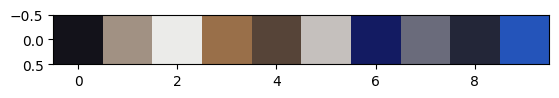

In [12]:
final_palette = KMeans(n_clusters=10).fit(all_colors).cluster_centers_.astype(int)

# Display the palette
import matplotlib.pyplot as plt
plt.imshow([final_palette])
plt.show()

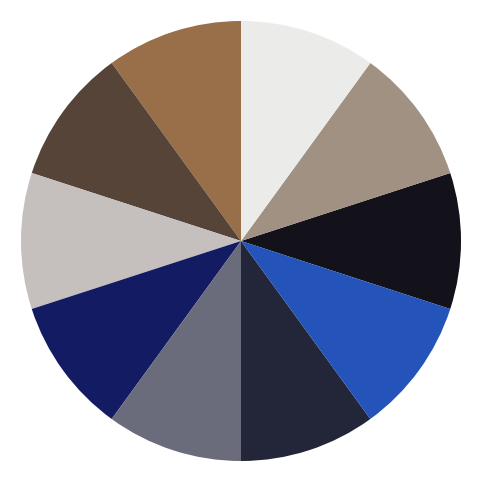

In [13]:
import matplotlib.pyplot as plt

# Convert the final palette to a usable color format
final_colors = [tuple(color / 255) for color in final_palette]  # Normalize to [0, 1] range

# Number of colors
num_colors = len(final_colors)

# Angles for the color wheel
angles = np.linspace(0, 2 * np.pi, num_colors, endpoint=False)

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
bars = ax.bar(angles, np.ones(num_colors), color=final_colors, width=2 * np.pi / num_colors)

# Remove radial and angular ticks
ax.set_yticks([])
ax.set_xticks([])
ax.spines['polar'].set_visible(False)

# Display the color wheel
plt.show()
